In [ ]:
import utilis
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
from scipy import linalg

In [ ]:
#np.load("filename.npy", allow pickle=True).item()

f = 1400
px = 750
py = 520.0
alfa = 1
beta = 0

R = cv2.Rodrigues(np.array([0.2, 0.2, -0.1]))[0]
t = np.array([[-0.08], [0.01], [0.03]])
Q = np.array([[-0.38], [0.1], [1.32]])

K = np.array([[f, f*beta, px],
              [0, alfa*f, py],
              [0,0,1]])

q = utilis.projectpoints(K,R,t,Q)
q

array([[557.52555675],
       [383.75661509]])

In [ ]:
p1 = np.array([[ 1.45349587e+02, -1.12915131e-01, 1.91640565e+00, -6.08129962e-01],
[ 1.05603820e+02, 5.62792554e-02, 1.79040110e+00, -2.32182177e-01]])

p2 = np.array([[ 1.3753556, -1.77072961, 2.94511795, 0.04032374],
[ 0.30936653, 0.37172814, 1.44007577, -0.03173825]])

H = utilis.hest(p1,p2, False)
def format_H_to_solution(H):
    ''' Helper function to scale H to appropriate value'''
    return H*(1/H[0][0])
format_H_to_solution(H)



array([[ 1.        ,  1.18450189,  2.73494707],
       [ 1.28494954,  1.44207391,  1.03919164],
       [ 3.92261028, -2.06451   , -4.72549386]])

In [ ]:
K = np.array([[300, 0, 840], [0, 300, 620], [0, 0, 1]], float)

k3 = -0.2 
k5 = 0.01 
k7 = 0.03
distCoeffs = [k3,k5,k7]
R = np.eye(3)
t=np.array([[0],[0], [0]])

P = utilis.getProjection_Matrix(K,R,t)

distortion = utilis.distort(P, distCoeffs)
projection_points = K@distortion
utilis.Pi(projection_points)



c:\Users\Leuro\Desktop\DTU\Computer Vision\Exercice\utilis.py:10: RuntimeWarning: divide by zero encountered in divide
  points_inhomogenous = points_homogenous[:-1] / points_homogenous[-1]
c:\Users\Leuro\Desktop\DTU\Computer Vision\Exercice\utilis.py:10: RuntimeWarning: invalid value encountered in divide
  points_inhomogenous = points_homogenous[:-1] / points_homogenous[-1]


array([[           nan,            nan, 9.79042223e+21,            nan],
       [           nan,            nan, 7.22626403e+21,            nan]])

In [ ]:
harris = np.load("Exam24/materials/harris.npy", allow_pickle=True).item()
harris.keys()

Ix_x = harris['g*(I_x^2)']
Iy_y = harris['g*(I_y^2)']
Ix_y = harris['g*(I_x I_y)']

k = 0.06
tao = 5

C = np.array([[Ix_x, Ix_y],
                  [Ix_y, Iy_y]])
a = C[0, 0]
b = C[1, 1]
c = C[0, 1]
r = a * b - c**2 - k * (a + b) ** 2

c = []
for i in range(1, r.shape[0] - 1):
    for j in range(1, r.shape[1] - 1):
        if (
            r[i, j] > r[i + 1, j]
            and r[i, j] >= r[i - 1, j]
            and r[i, j] > r[i, j + 1]
            and r[i, j] >= r[i, j - 1]
            and r[i, j] > tao
        ):  # Threshold
            c.append([i, j])
print(c)
print(r)
corners_index = np.where(r>tao )
corners_index

[[1, 2], [2, 3]]
[[10.9484 11.0936 10.8734 10.6226 10.1624]
 [10.7104 11.6746 12.38   11.7166 11.9926]
 [10.4324 11.4216 12.2894 12.7506 12.7164]
 [ 9.2844 10.4834 11.5136 12.135  12.6104]
 [ 7.9566  8.9254 10.0526 10.9664 11.9816]]


(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4], dtype=int64),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4], dtype=int64))

In [ ]:
sift_data = np.load("Exam24/materials/sift_data.npy", allow_pickle=True).item()
kp1 = sift_data["kp1"]
des1 = sift_data["des1"]
kp2 = sift_data["kp2"]
des2 = sift_data["des2"]

bf2 = cv2.BFMatcher()
matches_2 = bf2.knnMatch(des1,des2,k=2)
good = []
for m,n in matches_2:
    if m.distance < 0.8*n.distance:
        good.append([m])
print("Distinctive matches:", len(good))

Distinctive matches: 365


In [ ]:
K = np.array([[300, 0, 840], [0, 300, 620.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-2.3, -0.7, 1.0]))[0]
t1 = np.array([[0.0], [-1.0], [4.0]], float)
R2 = cv2.Rodrigues(np.array([-0.6, 0.5, -0.9]))[0]
t2 = np.array([[0.0], [0.0], [9.0]], float)
R3 = cv2.Rodrigues(np.array([-0.1, 0.9, -1.2]))[0]
t3 = np.array([[-1.0], [-6.0], [28.0]], float)

p1 = np.array([[853.0], [656.0]])
p2 = np.array([[814.0], [655.0]])
p3 = np.array([[798.0],[ 535.0]])

# F12 = utilis.fundamental_matrix(R1,t1,R2,t2,K,K)
# l  = utilis.epipolar_line(F12, utilis.PiInv(q2))
# # print(l.shape)
# # print(utilis.PiInv(q2).shape)
# distance_numerator = np.abs(l.T@utilis.PiInv(q1))
# distance = distance_numerator/(np.sqrt(l[0]**2 + l[1]**2))
# distance

F = utilis.fundamental_matrix(R1,t1,R2,t2,K, K)
q1 = utilis.PiInv(p1)

l1 = utilis.epipolar_line(F, q1)
#distance
l1 = l1/np.sqrt(l1[0]**2 + l1[1]**2)

distance = utilis.PiInv(p2).T@l1

print(distance)

[[-79.07052362]]


In [ ]:
P1 = utilis.getProjection_Matrix(K,R1,t1)
P2 = utilis.getProjection_Matrix(K,R2,t2)
P3 = utilis.getProjection_Matrix(K,R3,t3)

q = np.hstack((p1,p2,p3))
P = [P1,P2,P3]
Q = utilis.triangulate_nonlin(q,P)
Q

array([[ 0.25475585],
       [-1.53923675],
       [-0.14899195]])

In [ ]:
R = cv2.Rodrigues(np.array([-1.9, 0.1, -0.2]))[0]
t = np.array([-1.7, 1.3, 1.5], float).T
print(R)

-R.T@t

[[ 0.98175314  0.02913808  0.18791418]
 [-0.16781419 -0.33202055  0.92822452]
 [ 0.08943805 -0.942822   -0.32107243]]


array([ 1.75298172,  1.89539444, -0.40562912])

In [ ]:
K = np.array([[300, 0, 840], [0, 300, 620.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-2.3, -0.7, 1.0]))[0]
t1 = np.array([[0.0], [-1.0], [4.0]], float)
R2 = cv2.Rodrigues(np.array([-0.6, 0.5, -0.9]))[0]
t2 = np.array([[0.0], [0.0], [9.0]], float)
R3 = cv2.Rodrigues(np.array([-0.1, 0.9, -1.2]))[0]
t3 = np.array([[-1.0], [-6.0], [28.0]], float)

p1 = np.array([[853.0], [656.0]])
p2 = np.array([[814.0], [655.0]])
p3 = np.array([[798.0],[ 535.0]])

Q3 = np.array([[-0.38], [0.1], [1.32]])

q3 = utilis.projectpoints(K, R3, t3, Q3)
q2 = utilis.projectpoints(K, R2, t2, Q3)
# print(q3)
# F23 = utilis.fundamental_matrix(R2,t2,R3,t3,K, K)
# l2 = utilis.epipolar_line(F23,utilis.PiInv(q3))

# q2 = l2/F23.T

# q2 = utilis.Pi(q2)
# print(q2)
q = np.hstack((q2,q3))
P = [P2,P3]
Q = utilis.triangulate(q,P)

Q




array([[-0.38],
       [ 0.1 ],
       [ 1.32]])

In [ ]:
inliers = 465/1177
outliers = 1 - inliers
p = 0.90
homography = 4
N = utilis.smallest_number_iterations(1177, 465, 0.9, 4)
N.round()


93.0

In [ ]:
# Standard deviation of keypoint detection error
sigma = 1.4


# 90th percentile of the chi-squared distribution for 2 degrees of freedom
chi_squared_90th = 5.99

squared_threshold = chi_squared_90th * sigma**2

squared_threshold
# threshold = math.sqrt(squared_threshold)

11.7404

In [ ]:
primary = np.array([12, 9, 10, 13, 18, 25, 33, 40, 46, 49, 48, 45, 39, 31, 23, 17])
secondary = np.array([15, 29, 43, 49, 43, 29, 15, 10])
print(primary.shape)

fft_primary = np.fft.rfft(primary, axis=0)
theta_primary = (np.angle(primary[1]))*40 #angle, phase

fft_secondary = np.fft.rfft(secondary, axis=0) #phase of an image with the projector fully off
theta_secondary = (np.angle(fft_secondary[1]))*41

theta_c = (41*theta_secondary - 40*theta_primary) % (2 * np.pi)
o_primary = np.rint((40 * theta_c - theta_primary) /( 2 * np.pi))
theta = ((2 * np.pi * o_primary + theta_primary) / 40) % (2 * np.pi)
theta

(16,)


3.9269908169872414

455
[[455.   0. 500.]
 [  0. 455. 375.]
 [  0.   0.   1.]]


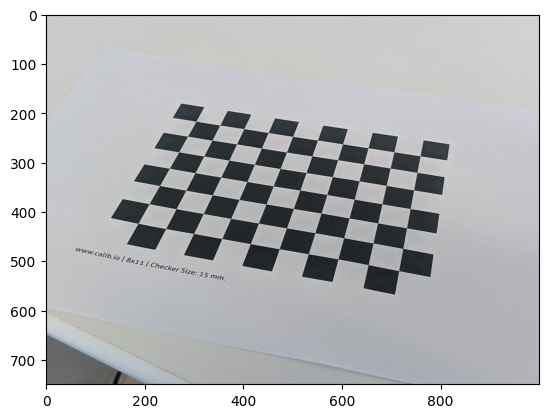

In [ ]:
image = cv2.imread("Exam24/materials/board0.jpg")
image = image[:,:,::-1]
plt.imshow(image)

# Get the width and height of the image
width = image.shape[1]
height = image.shape[0]

# Principal points are half of the height and width of the image
ppy= height /2
ppx = width /2

#get the focal length
f_length= int( width * 0.455732) 
print(f_length)


K = np.array([[f_length, 0, ppx], [0, f_length, ppy], [0,0,1]])

print(K)



In [ ]:
def get_rgb(path):
    bgr_img = cv2.imread(path)
    b,g,r = cv2.split(bgr_img)       # get b,g,r
    image = cv2.merge([r,g,b])
    return image
images = []
for i in range(5):
    image = get_rgb(f'Exam24/materials/board{i}.jpg')
    image = cv2.resize(image, (600, 400))
    images.append(image)

    imgpoints = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7, 10))
    if ret == True:
        imgpoints.append(corners)
        print(f"Corners found in image: {len(corners)}")
        # Draw and display the corners
        painted = cv2.drawChessboardCorners(img.copy(), (7, 10), corners,ret)
        # cv2.imshow('img',painted)
        # cv2.waitKey(400)
# delete images for which no corners were found
# cv2.destroyAllWindows()
print(f"{len(images)} images have been loaded.")
print(f"{len(imgpoints)} is the Number of images in which chessboard corners were successfully detected..")